In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
import os
path = os.getcwd() + '/dane1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

## Ex 1

In [3]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


## Ex 2

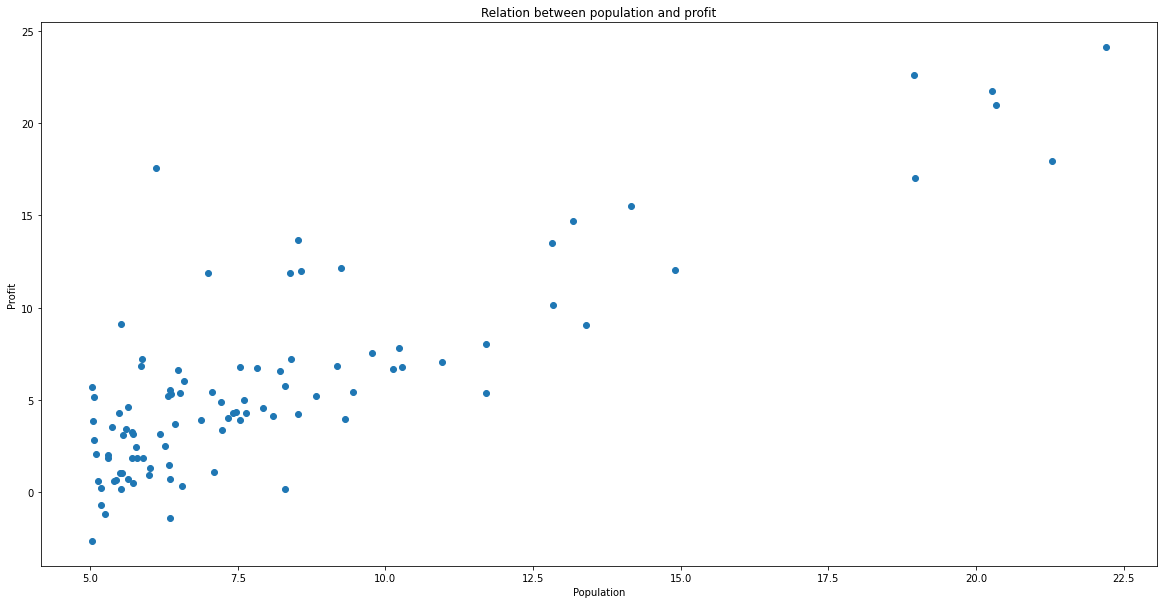

In [5]:
plt.scatter(data.Population, data.Profit)
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Relation between population and profit')
plt.show()

## Ex 3

In [6]:
data.insert(loc=0, column='Cost', value=1, allow_duplicates=False)
data.head()

,Cost,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


## Ex 4

In [7]:
X = data[['Cost', 'Population']]
X.head()

,Cost,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [8]:
y = data.Profit
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: Profit, dtype: float64

In [9]:
X = np.matrix(X.values, dtype=np.float64).transpose()
y = np.matrix(y.values, dtype=np.float64)
theta = np.matrix(np.array([0,0]), dtype=np.float64)

## Ex 6

In [10]:
def computeCost(X, y, theta):
    return np.sum(np.power(np.dot(theta, X) - y, 2))/(2*X.shape[1])

## Ex 7

In [11]:
computeCost(X, y, theta)

32.072733877455676

## Ex 8

In [12]:
alpha = 0.01
it = 1000

In [13]:
def gradientDescent (X, y, theta, alpha, iterations):
    cost = []
    for it in range(iterations):
        hypothesis = theta.dot(X)
        for i in range(theta.size):
            theta[0, i] = float(theta[0, i] - alpha*(1/y.shape[1])*np.sum((hypothesis - y).dot(np.transpose(X[i]))))
        cost.append(computeCost(X, y, theta))
    return theta, cost

In [14]:
theta_res = gradientDescent(X, y, theta, alpha, it)[0]
cost = gradientDescent(X, y, theta, alpha, it)[1]

## Ex 9 

In [15]:
theta_res

matrix([[-3.78806857,  1.18221277]])

## Ex 10

In [16]:
cost[-1]

4.478027609879971

## Ex 11

In [17]:
#predicted values
predY = theta_res * X

In [18]:
# For plotting purposes only
X = np.squeeze(np.asarray(X[1]))
y = np.squeeze(np.asarray(y))
predY = np.squeeze(np.asarray(predY))

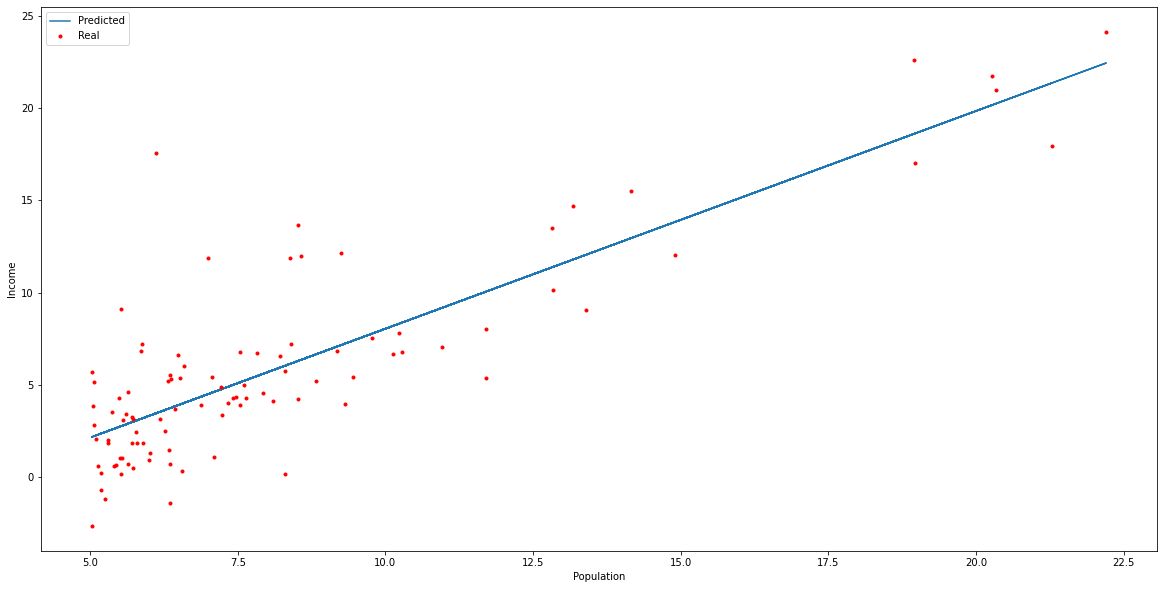

In [19]:
plt.plot(X, predY, X, y, 'r.')
plt.xlabel('Population')
plt.ylabel('Income')
plt.legend(['Predicted', 'Real'])
plt.show()

## Ex 12

In [20]:
iterations = range(it)
costVal = np.squeeze(np.asarray(cost))

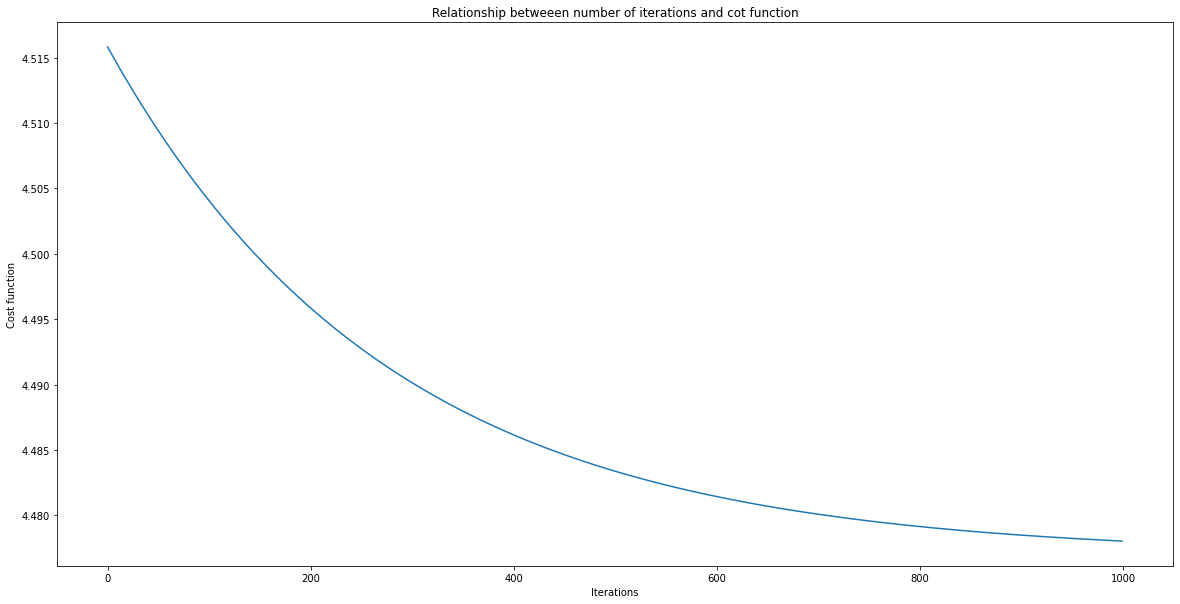

In [21]:
plt.plot(iterations, costVal)
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.title('Relationship betweeen number of iterations and cot function')
plt.show()

# Linear regression with multiple variables

In [22]:
path = os.getcwd() + '/dane2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])


data2Bak = data2.copy()
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [23]:
data2.Bedrooms = (data2.Bedrooms - data2.Bedrooms.mean()) / data2.Bedrooms.std()
data2.Size = (data2.Size - data2.Size.mean()) / data2.Size.std()
data2.Price = (data2.Price - data2.Price.mean()) / data2.Price.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


## Ex 3

In [24]:
data2.insert(loc=0, column='Cost', value=1, allow_duplicates=False)

## Ex 4

In [25]:
X = data2[['Cost', 'Size', 'Bedrooms']]
X.head()

,Cost,Size,Bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [26]:
y = data2.Price
y.head()

0    0.475747
1   -0.084074
2    0.228626
3   -0.867025
4    1.595389
Name: Price, dtype: float64

In [27]:
X = np.matrix(X.values, dtype=np.float64).transpose()
y = np.matrix(y.values, dtype=np.float64)
theta = np.matrix(np.array([0,0,0]), dtype=np.float64)

## Ex 7

In [28]:
computeCost(X, y, theta)

0.4893617021276595

In [29]:
theta_res = gradientDescent(X, y, theta, alpha, it)[0]
cost = gradientDescent(X, y, theta, alpha, it)[1]

## Ex 9 

In [30]:
theta_res

matrix([[-1.10833328e-16,  8.84682367e-01, -5.30951990e-02]])

## Ex 10

In [31]:
cost[-1]

0.13068648355046528

## Ex 11

In [32]:
xdata = np.linspace(-3,3,1000)
ydata = np.linspace(-3,3,100)
X,Y = np.meshgrid(xdata,ydata)

In [33]:
Z = theta_res[0, 0] + X * theta_res[0, 1] + Y * theta_res[0, 2] 

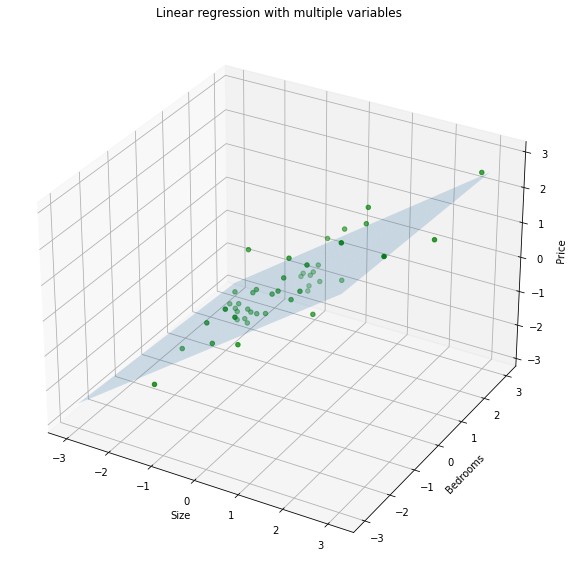

In [34]:
# Create the figure
fig = plt.figure()

# Add an axes
ax = fig.add_subplot(111,projection='3d')

# plot the surface
ax.plot_surface(X, Y, Z, alpha=0.2)

# and plot the point 
ax.scatter(data2.Size, data2.Bedrooms, data2.Price, c='g')
plt.title("Linear regression with multiple variables")
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
 
# show plot
plt.show()

# Linear regression - Python

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model as linm
from sklearn.model_selection import train_test_split
 
# Regression models
# http://scikit-learn.org/stable/modules/linear_model.html
 
# Load the boston dataset
boston = datasets.load_boston()
# print description
print(boston.DESCR)
# get the data
boston_X = boston.data
boston_Y = boston.target

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [36]:
boston_title = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

## Ex 1

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(boston_X, boston_Y, test_size = 0.3, train_size = 0.7)

## Ex 2

In [38]:
# Stworzenie obiektu 
regr = linm.LinearRegression()
 
# Uczenie modelu przy pomocy bazy treningowej
regr.fit(X_train, Y_train)
# Przewidywanie wartości dla danych testowych
Y_predicted = regr.predict(X_test)
 
# Wyświetlenie parametrów prostej
print('Coefficients: \n', regr.coef_)
 
#  Obliczamy rzeczywisty popełniony błąd średnio-kwadratowy
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [-1.13994349e-01  4.81551243e-02 -3.00856464e-03  2.90259826e+00
 -1.40088658e+01  4.25068062e+00 -1.58267931e-02 -1.47083861e+00
  2.68290793e-01 -1.22592261e-02 -8.56441194e-01  1.11625873e-02
 -4.71113245e-01]
Residual sum of squares: 21.56945651267758


## Ex 3

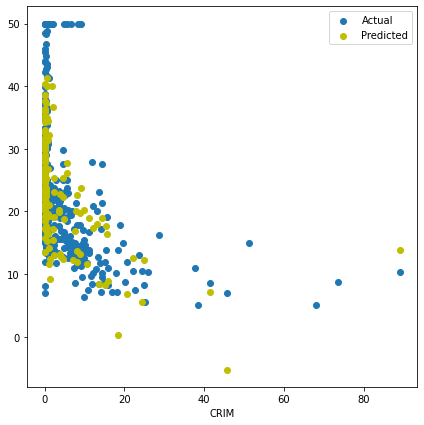

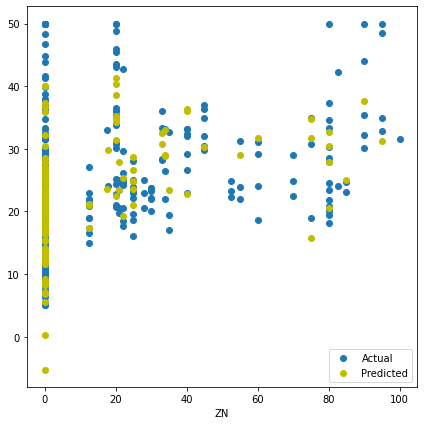

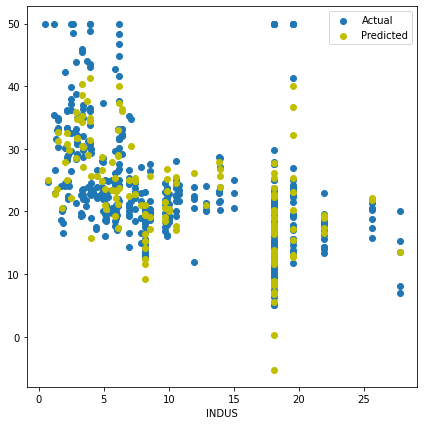

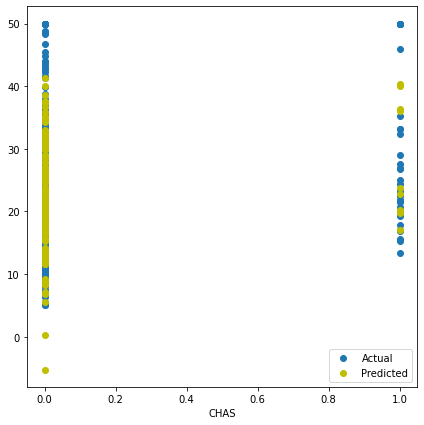

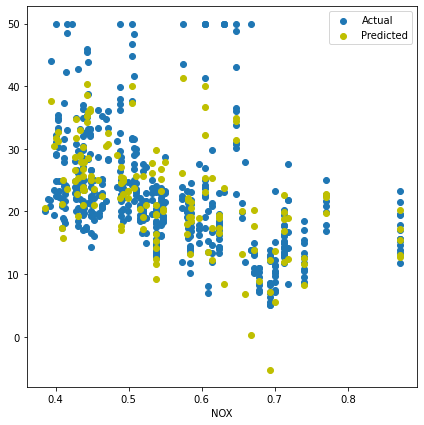

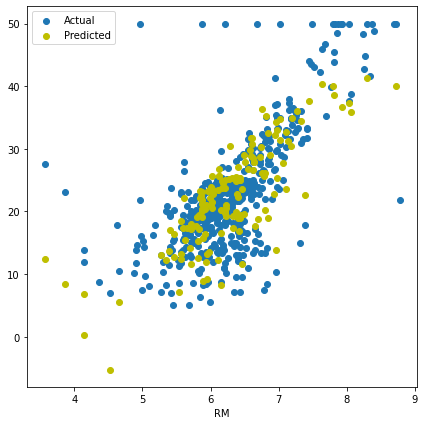

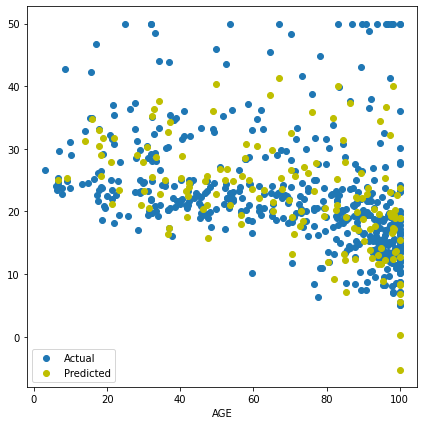

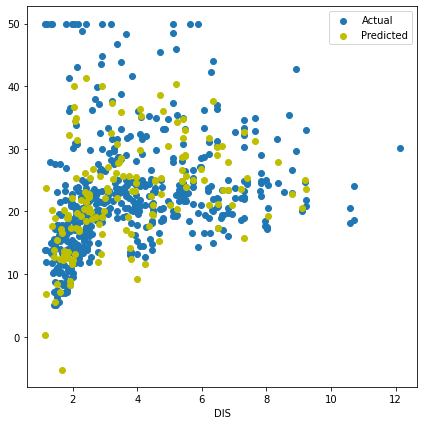

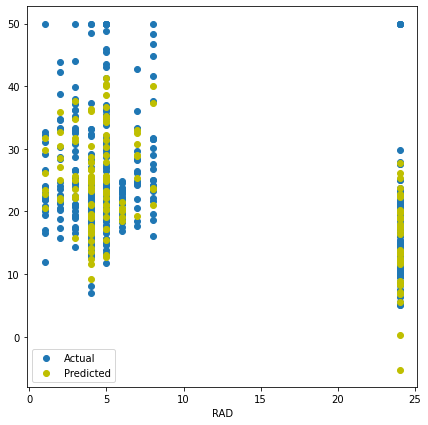

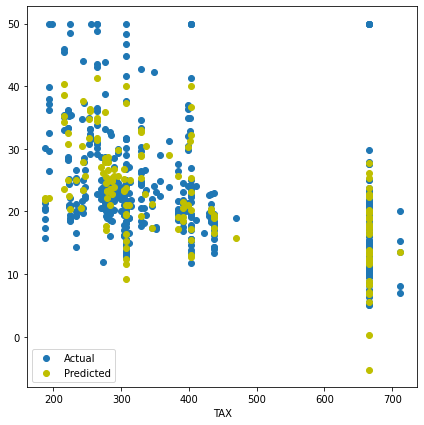

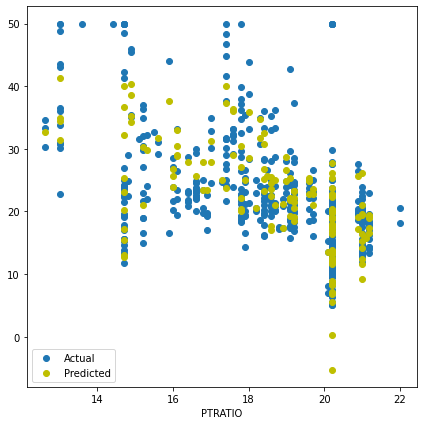

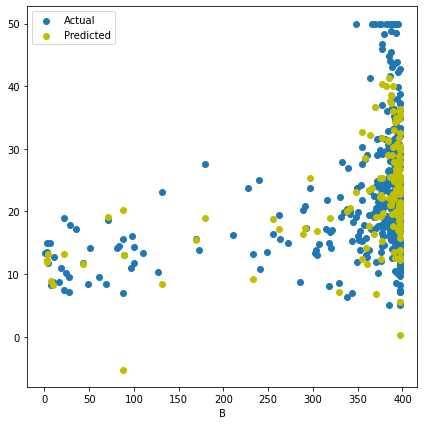

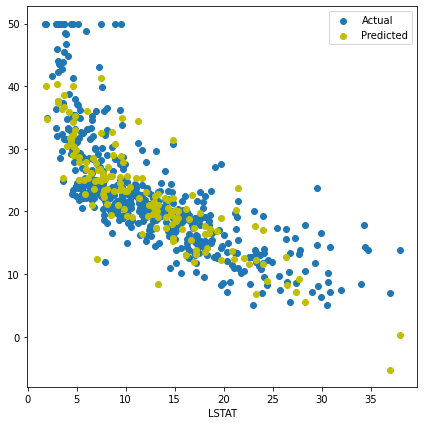

In [39]:
data3 = pd.DataFrame(data = np.c_[boston['data'], boston['target']])
for col in data3.columns[:-1]:
    plt.figure(figsize = [7, 7])
    xx = np.linspace(data3[col].values.min(), data3[col].values.max(), 100)
    plt.scatter(data3[col].values, data3[13])
    plt.scatter(X_test[:, col], Y_predicted, c='y')
    plt.legend(['Actual', 'Predicted'])
    plt.xlabel(boston_title[col])
    plt.show()


## Additional

In [40]:
reg_Ridge = linm.Ridge(alpha = .5)
reg_Lasso = linm.Lasso(alpha = 5.1)
reg_ElNet = linm.ElasticNet(alpha = .5, l1_ratio=0.5)

reg_Ridge.fit(X_train, Y_train)
reg_Lasso.fit(X_train, Y_train)
reg_ElNet.fit(X_train, Y_train)

print("Ridge: Residual sum of squares: {}".format(np.mean((reg_Ridge.predict(X_test) - Y_test) ** 2)))
print("Lasso: Residual sum of squares: {}".format(np.mean((reg_Lasso.predict(X_test) - Y_test) ** 2)))
print("ElNet: Residual sum of squares: {}".format(np.mean((reg_ElNet.predict(X_test) - Y_test) ** 2)))

Ridge: Residual sum of squares: 21.921406429827584
Lasso: Residual sum of squares: 36.77300898751766
ElNet: Residual sum of squares: 24.091417880671756
